# **Importación de bibliotecas y dataframe**

In [ ]:
import pandas as pd
import numpy as np, gc
import matplotlib.pyplot as plt
import seaborn as sns





from sklearn.experimental import enable_iterative_imputer
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, f1_score, silhouette_score



In [ ]:
#Descargamos el archivo de datos de clima
!gdown 1xFv2WH8WHgUGENovFHkIzyCJ_NxCacRr

Downloading...
From: https://drive.google.com/uc?id=1xFv2WH8WHgUGENovFHkIzyCJ_NxCacRr
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 50.4MB/s]


In [ ]:
#Descargamos el archivo de datos de las ciudades de Australia
!gdown 1oxugU5Vtw1nrBHNU_gcv54-TezdkINy7

Downloading...
From: https://drive.google.com/uc?id=1oxugU5Vtw1nrBHNU_gcv54-TezdkINy7
To: /content/Australia Entire Dataset.xlsx
100% 182k/182k [00:00<00:00, 109MB/s]


Datos sacados de la página **https://www.kaggle.com/datasets/amithjohn/all-cities-in-australia-dataset**

In [ ]:
ruta_clima = r'/content/weatherAUS.csv'
ruta_ciudades = r'/content/Australia Entire Dataset.xlsx'

clima = pd.read_csv(ruta_clima)
ciudades = pd.read_excel(ruta_ciudades)

# **Contexto**

El proyecto trata sobre una serie de datos de el **clima en Australia**. En este trabajo, nuestro objetivo es **predecir si va a llover o no** el día posterior a los datos que tenemos.  




**Variables explicativas:**  
* `Date`: La fecha de la observación.
* `Location`: El nombre de la ciudad donde se realizó la observación.
* `MinTemp`: La temperatura mínima en grados Celsius.
* `MaxTemp`: La temperatura máxima en grados Celsius.
* `Rainfall`: La cantidad de lluvia registrada en mm.
* `Evaporation`: La tasa de evaporación en mm.
* `Sunshine`: La cantidad de horas de sol brillante.
* `WindGustDir`: La dirección de la ráfaga de viento más fuerte en las 24 horas previas.
* `WindGustSpeed`: La velocidad de la ráfaga de viento más fuerte en las 24 horas previas en km/h.
* `WindDir9am`: La dirección del viento a las 9 am.
* `WindDir3pm`: La dirección del viento a las 3 pm.
* `WindSpeed9am`: La velocidad media del viento a las 9 am en km/h.
* `WindSpeed3pm`: La velocidad media del viento a las 3 pm en km/h.
* `Humidity9am`: La humedad relativa a las 9 am en porcentaje.
* `Humidity3pm`: La humedad relativa a las 3 pm en porcentaje.
* `Pressure9am`: La presión atmosférica a las 9 am en hPa (Hectopascales).
* `Pressure3pm`: La presión atmosférica a las 3 pm en hPa (Hectopascales).
* `Cloud9am`: La fracción de cielo cubierta por nubes a las 9 am en octavos.
* `Cloud3pm`: La fracción de cielo cubierta por nubes a las 3 pm en octavos.
* `Temp9am`: La temperatura a las 9 am en grados Celsius.
* `Temp3pm`: La temperatura a las 3 pm en grados Celsius.
* `RainToday`: Indica si llovió o no el día de la observación.


**Variable objetivo (Target):**  
* `RainTomorrow`: Indica si lloverá o no al día siguiente.

In [ ]:
clima.info()
clima.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
#Revisión rápida del df secundario
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4136 non-null   int64  
 1   id          4136 non-null   int64  
 2   name        4136 non-null   object 
 3   latitude    4136 non-null   float64
 4   longitude   4136 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 161.7+ KB


En este caso, del DF ciudades solo no sinteresa la ciudad, la Latitud y la Longitud.

# **Clusterización**

Decidimos usar lo aprendido en minería de datos y usar el método K-Means para la clusterizacion de las ciudades. Primero agarramos el DF "Ciudades" y le asignamos una nueva columna llamada "Región", para luego asignarle cada region al DF de clima.

En primera instancia pensamos en 5 clusters, pero luego de visualizarlo decidimos que 4 seria una mejor opción (N, S, E, O) debido a la distribución desigual de las ciudades.

In [ ]:
#Habia una coordenada en el (0,0) que nos deformaba el mapa, no afecta en nada borrarla.
ciudades = ciudades[ciudades['latitude'] != 0]

Antes de asignar la region, vimos que varias locaciones que estan en el DF "clima" no estan en el DF "ciudades", por lo que las ubicaciones faltantes las agregamos a mano.

In [ ]:
datos_nuevos = {'name': ['badgeryscreek', 'coffsharbour', 'norahhead', 'norfolkisland',
                             'sydneyairport', 'waggawagga', 'tuggeranong', 'mountginini',
                              'melbourneairport', 'nhil', 'dartmoor', 'goldcoast', 'mountgambier',
                              'witchcliffe', 'pearceraaf', 'perthairport', 'salmongums', 'walpole',
                              'alicesprings', 'uluru', 'woomera'],
                'latitude': [-33.90, -30.32, -33.28, -29.04, -33.95, -35.13, -35.42, -35.53,
                            -37.67, -36.33, -37.93, -28.02, -37.83, -34.03, -31.67, -31.94,
                            -32.98, -34.98, -23.70, -25.34, -31.19],
                'longitude': [150.73, 153.12, 151.58, 167.94, 151.18, 147.37, 149.09, 148.77,
                              144.85, 141.65, 141.28, 153.40, 140.78, 115.10, 116.02, 115.97,
                              121.65, 116.73, 133.88, 131.04, 136.82]}

ciudades_agregadas = pd.DataFrame(datos_nuevos)

ciudades = pd.concat([ciudades, ciudades_agregadas], ignore_index=True)

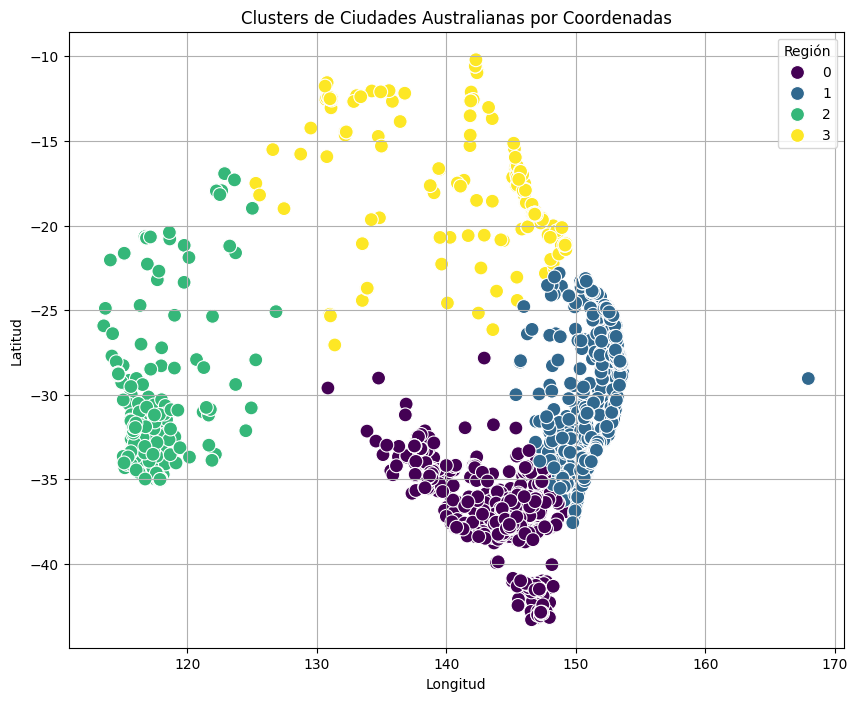

In [ ]:
#Seleccionamos las coordenadas para el clustering
coordenadas = ciudades[['latitude', 'longitude']]

# Inicializamos y entrenamos el modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ciudades['Region'] = kmeans.fit_predict(coordenadas)

#Visualizamos los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='Region',
    data=ciudades,
    palette='viridis',
    s=100)
plt.title('Clusters de Ciudades Australianas por Coordenadas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Región')
plt.grid(True)
plt.show()


Vemos un punto alejado pero es porque es la Isla Norfolk, territorio australiano

In [ ]:
# Defimos un diccionario para saber a que region pertenece cada ciuadad
region_perteneciente = {0: 'Sur', 1: 'Este', 2: 'Oeste', 3: 'Norte'}

#Reemplazamos
ciudades['Region'] = ciudades['Region'].replace(region_perteneciente)

In [ ]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4135 non-null   float64
 1   id          4135 non-null   float64
 2   name        4156 non-null   object 
 3   latitude    4156 non-null   float64
 4   longitude   4156 non-null   float64
 5   Region      4156 non-null   object 
dtypes: float64(4), object(2)
memory usage: 194.9+ KB


In [ ]:
#Antes de hacer el mapeo normalizamos el nombre de las ciudades
clima['Location'] = clima['Location'].str.lower()
clima['Location'] = clima['Location'].str.strip()
clima['Location'] = clima['Location'].str.replace(' ', '')

ciudades['name'] = ciudades['name'].str.lower()
ciudades['name'] = ciudades['name'].str.strip()
ciudades['name'] = ciudades['name'].str.replace(' ', '')


#Creamos un diccionario que guarda como valor la region de cada ciudad
#Dropeamos nombres de ciudades repetidos
mapa_de_regiones = ciudades.drop_duplicates(subset=['name']).set_index('name')['Region']

#repetimos para añadir latitud y longitud
mapa_de_lat = ciudades.drop_duplicates(subset=['name']).set_index('name')['latitude']
mapa_de_lng = ciudades.drop_duplicates(subset=['name']).set_index('name')['longitude']


#Creamos una nueva columna en el DF de clima mapeando la ciudad con el valor del diccionario creado anteriormente
clima['Latitud'] = clima['Location'].map(mapa_de_lat)
clima['Longitud'] = clima['Location'].map(mapa_de_lng)
clima['Region'] = clima['Location'].map(mapa_de_regiones)


clima[['Location','Latitud', 'Longitud', 'Region']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  145460 non-null  object 
 1   Latitud   145460 non-null  float64
 2   Longitud  145460 non-null  float64
 3   Region    145460 non-null  object 
dtypes: float64(2), object(2)
memory usage: 4.4+ MB


Vemos que todas las ciudades del df tienen asignada su region correspondiente, por lo tanto la clusterizacion por región esta terminada.

Vamos a verla en un mapa.

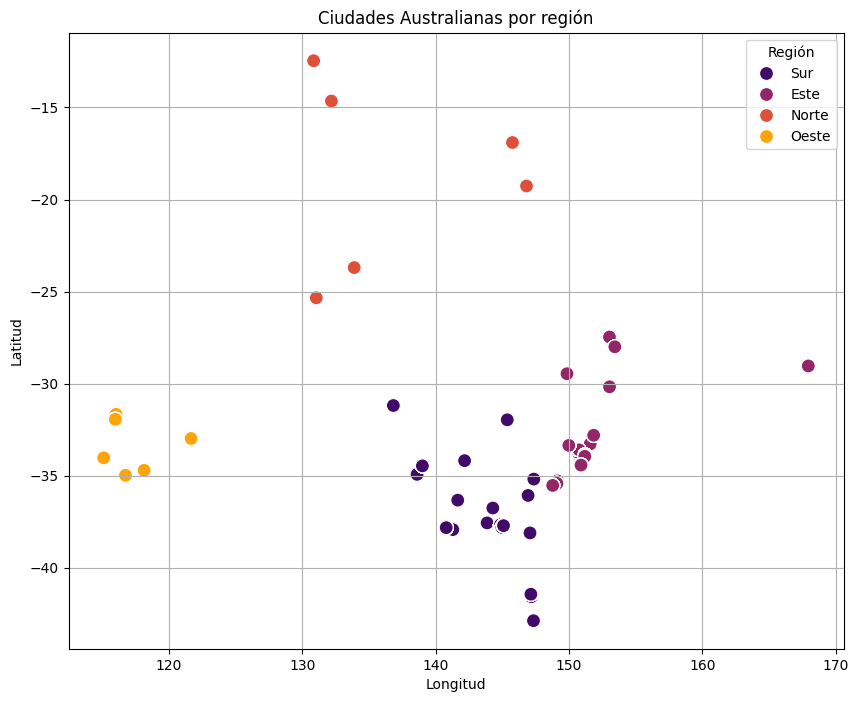

In [ ]:
#Visualizamos los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Longitud',
    y='Latitud',
    hue='Region',
    data=clima,
    palette='inferno',
    s=100)
plt.title('Ciudades Australianas por región')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Región')
plt.grid(True)
plt.show()

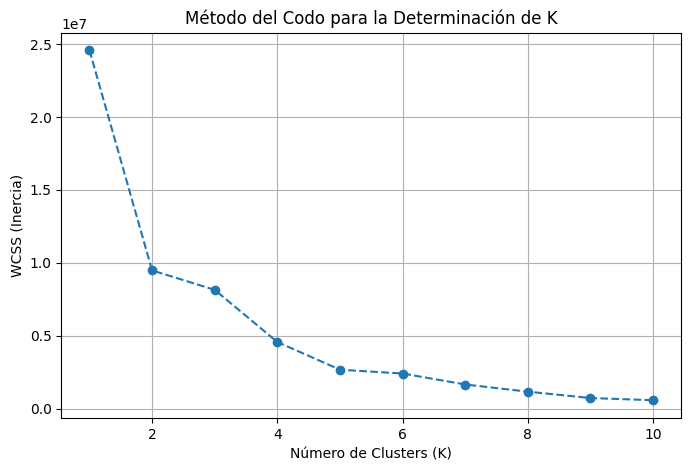

In [ ]:
# Extraemos las coordenadas
coordenadas = clima[['Latitud', 'Longitud']].values

# Rango de K a probar
K_range = range(1, 11)
wcss = []

# Calculamos WCSS para cada K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coordenadas)
    wcss.append(kmeans.inertia_)

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Método del Codo para la Determinación de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()



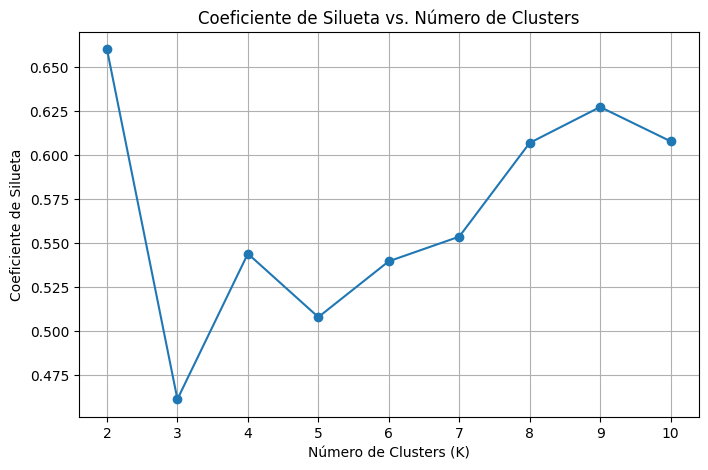

In [ ]:
# Determinamos el tamaño de la muestra
n_muestras = int(len(clima) * 0.10) # 10%

coordenadas_muestra = clima[['Latitud', 'Longitud']].sample(
    n=n_muestras, random_state=42).values

# Rango de K a probar
K_range_silueta = range(2, 11)
silhouette_scores = []

# Calculamos el Coeficiente de Silueta para cada K
for k in K_range_silueta:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coordenadas_muestra)
    score = silhouette_score(coordenadas_muestra, kmeans.labels_)
    silhouette_scores.append(score)

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(K_range_silueta, silhouette_scores, marker='o', linestyle='-')
plt.title('Coeficiente de Silueta vs. Número de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

# **Análisis exploratorio y limpieza primaria**


Vemos un paneo general de datos que ya teniamos

In [ ]:
print(clima.info())
print(clima.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Vemos que hay filas sin la variable target, no podemos considerarlas útiles si ni si quiera se sabe si llovió o no. Las eliminamos.

In [ ]:
clima = clima.dropna(subset=['RainTomorrow'])

clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Se borraron un total de 3267 filas.

In [ ]:
clima.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Region
0,2008-12-01,albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,-36.07482,146.92401,Sur
1,2008-12-02,albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,-36.07482,146.92401,Sur
2,2008-12-03,albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,-36.07482,146.92401,Sur
3,2008-12-04,albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,-36.07482,146.92401,Sur
4,2008-12-05,albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,-36.07482,146.92401,Sur


In [ ]:
#La nubosidad esta medida en octavos (u octas). El valo máximo que pueden tener estas es 8 y hay algunas con valor 9, asi que las que tengan valor 9 las tomamos como el
#valor máximo (8)
clima.loc[clima['Cloud9am'] == 9, 'Cloud9am'] = 8
clima.loc[clima['Cloud3pm'] == 9, 'Cloud3pm'] = 8

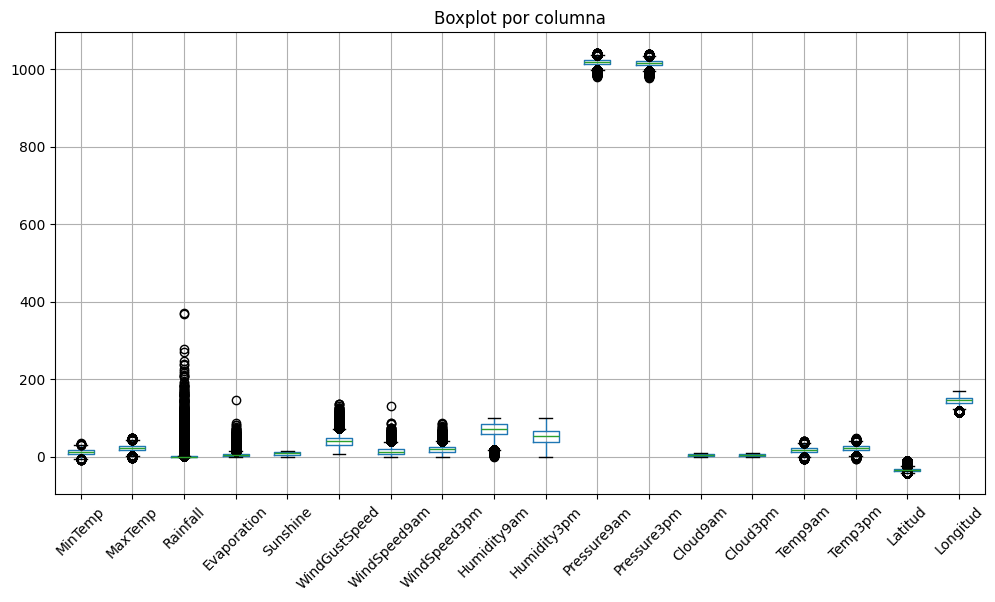

In [ ]:
clima.boxplot(figsize=(12,6))
plt.title("Boxplot por columna")
plt.xticks(rotation=45)
plt.show()

Como observamos, no se pueden sacar muchas conclusiones además de que en los datos hay muchos outliers. Hasta que no escalemos las variables no tendremos mucha más información

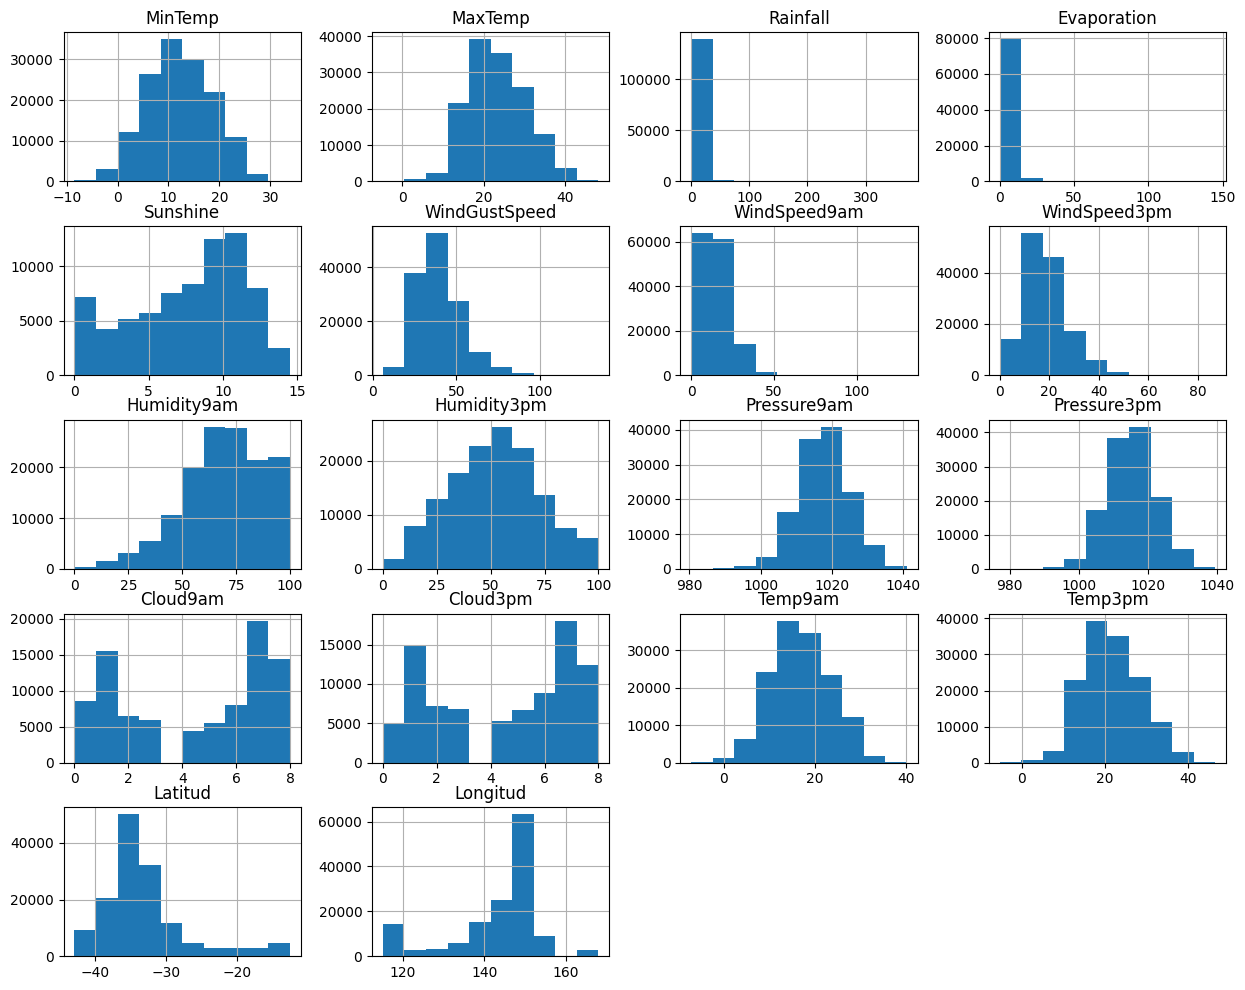

In [ ]:
clima.hist(figsize=(15,12))
plt.title("histograma por columna")

plt.show()

In [ ]:
#Calculamos el porcentaje de nulos por variable
porcentaje_nulos = clima.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
print(porcentaje_nulos)

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Pressure9am       9.855619
Pressure3pm       9.832411
WindDir9am        7.041838
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir3pm        2.656952
Humidity3pm       2.538803
Temp3pm           1.917113
WindSpeed3pm      1.849599
Humidity9am       1.247600
Rainfall          0.988797
RainToday         0.988797
WindSpeed9am      0.948007
Temp9am           0.635756
MinTemp           0.447983
MaxTemp           0.226453
Date              0.000000
Location          0.000000
RainTomorrow      0.000000
Latitud           0.000000
Longitud          0.000000
Region            0.000000
dtype: float64


Vemos que hay muchos nulos en algunas columnas, casi la mitad de los datos en los que más faltan, por lo que al momento de la imputación (luego de la separación) deberemos seguir un criterio.

In [ ]:
#Veamos si el modelo está balanceado
print(clima['RainTomorrow'].value_counts(normalize=True))

RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64


El dataset está visiblemente desbalanceado.
En la consigna se pregunta esto porque por ejemplo si tenemos un modelo que solo devuelve "No", tendriamos un accuracy del 77% (que es bastante bueno) cuando en realidad el modelo seria MUY malo.

Haremos el correcto balanceo una vez tengamos dividio y completamente limpio el DF

#**Separación del DF, Limpieza profunda y Modelos de predicción**

In [ ]:
# Separamos las características (X) y el objetivo (y)
x = clima.drop('RainTomorrow', axis=1)
y = clima['RainTomorrow']

# Dividimos en entrenamiento y prueba el DF
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) #'stratify=y' asegura que la proporción


In [ ]:
#Calculamos el porcentaje de nulos por variable pero esta vez del x_train
porc_nulos_x_train = x_train.isnull().mean() * 100
porc_nulos_x_train = porc_nulos_x_train.sort_values(ascending=False)
print(porc_nulos_x_train)

Sunshine         47.773265
Evaporation      42.807286
Cloud3pm         40.147160
Cloud9am         37.692740
Pressure9am       9.922288
Pressure3pm       9.900311
WindDir9am        7.081070
WindGustDir       6.579988
WindGustSpeed     6.540429
WindDir3pm        2.695290
Humidity3pm       2.546724
Temp3pm           1.936635
WindSpeed3pm      1.872462
Humidity9am       1.246550
Rainfall          0.994251
RainToday         0.994251
WindSpeed9am      0.951175
Temp9am           0.646131
MinTemp           0.450973
MaxTemp           0.226805
Date              0.000000
Location          0.000000
Latitud           0.000000
Longitud          0.000000
Region            0.000000
dtype: float64


Hay 4 columnas con un porcentaje muy alto de faltantes, asi que tomamos la decisión de hacer pruebas imputando los datos faltantes.

In [ ]:
#Latitud y longitud ya no nos sirven más
x_train = x_train.drop(['Latitud', 'Longitud'], axis=1)


In [ ]:
# Separamos las columnas en categóricas y numéricas
cat_cols = x_train.select_dtypes(include='object').columns
num_cols = x_train.select_dtypes(exclude='object').columns

print("Columnas Categóricas:")
print(cat_cols)
print("Columnas Numéricas:")
print(num_cols)

Columnas Categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'Region'],
      dtype='object')
Columnas Numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [ ]:
print(x_train[cat_cols].isnull().sum())
print(x_train[num_cols].isnull().sum())

Date              0
Location          0
WindGustDir    7485
WindDir9am     8055
WindDir3pm     3066
RainToday      1131
Region            0
dtype: int64
MinTemp            513
MaxTemp            258
Rainfall          1131
Evaporation      48695
Sunshine         54344
WindGustSpeed     7440
WindSpeed9am      1082
WindSpeed3pm      2130
Humidity9am       1418
Humidity3pm       2897
Pressure9am      11287
Pressure3pm      11262
Cloud9am         42877
Cloud3pm         45669
Temp9am            735
Temp3pm           2203
dtype: int64


##Método por imputación

Primero vamos a entrenar un modelo sin borrar las columnas a ver que tan bien nos dan las métricas para luego compararlas con las del modelo sin las columnas.

####Codificación y escalado de variables

Primero codificamos las variable target, para que tengamos una serie de 0 y 1 en vez de si y no

In [ ]:
# Creamos una instancia del labelEncoder para nuestras variables objetivo
le = LabelEncoder()

# Entrenamos y aplicamos el labelEncoder
y_train_imp = le.fit_transform(y_train)
y_test_imp = le.transform(y_test)


print("Clases aprendidas por el LabelEncoder:", le.classes_)

Clases aprendidas por el LabelEncoder: ['No' 'Yes']


In [ ]:
# Pipeline para datos numéricos:
# Paso 1: Imputamod con IterativeImputer las columnas numéricas
# Paso 2: Escalamos los datos
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=42)),
    ('scaler', StandardScaler())
])

# Pipeline para datos categóricos:
# Paso 1: Imputamos los faltantes con la moda
# Paso 2: Aplicamos One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Unimos los pipelines en un solo objeto pre-procesador con ColumnTransformer
# Este objeto aplicará las transformaciones necesarias según el tipo de columna que sean
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Aplicamos el pre-procesador a los datos
x_train_imp = preprocessor.fit_transform(x_train)
x_test_imp = preprocessor.transform(x_test)


# Verificación
print("Forma de x_train después del pre-procesamiento:", x_train_imp.shape)
print("Forma de x_test después del pre-procesamiento:", x_test_imp.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Forma de x_train después del pre-procesamiento: (113754, 3530)
Forma de x_test después del pre-procesamiento: (28439, 3530)


Los datos ahora estan en un Numpy array, pasarlos a df es muy caro computacionalmente y nos tiró error de RAM varias veces

####Entrenamiento y predicción

In [ ]:
# Creamos el modelo
regresión_logis = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42) # Usamos class_weight='balanced' para manejar el desbalance de clases.

# Entrenamos el modelo
print("Entrenando el modelo de Regresión Logística...")
regresión_logis.fit(x_train_imp, y_train_imp)
print("Modelo correctamente entrenado")

Entrenando el modelo de Regresión Logística...
Modelo correctamente entrenado


In [ ]:
# Realizamos las predicciones
y_pred = regresión_logis.predict(x_test_imp)

In [ ]:
#Métricas del modelo
print("Accuracy:", accuracy_score(y_test_imp, y_pred))
print("Informe de Clasificación:")
print(classification_report(y_test_imp, y_pred))

Accuracy: 0.8149372340799607
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     22064
           1       0.56      0.80      0.66      6375

    accuracy                           0.81     28439
   macro avg       0.75      0.81      0.77     28439
weighted avg       0.85      0.81      0.83     28439



* ***Accuracy***: Vemos que el modelo, en total acierta el 81% de los días, es una buena métrica pero no es la única asi que las comparamos con las demás.
* ***Recall***: De los días que en verdad llovieron, el modelo acerto un 80% de las veces. Podemos decir que el modelo es bastante bueno prediciendo si va a llover.
* ***Precision***: De las veces que el modelo predijo que iba a llover, acertó un 56%. Podriamos decir que es el punto más flojo del modelo haciendote llevar el paragüas por las dudas.
* ***f1-score***: Es un promedio entre el Recall y la Precision, al ser uno alto y e otro bajo el f1-score quedo bastante balanceado con 66%.

In [ ]:
# Subsample estratificado
Xs, _, ys, _ = train_test_split(x_train_imp, y_train_imp,
                                train_size=60000, stratify=y_train_imp,
                                random_state=42)

# 3 folds livianos
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
f1s = []
for tr_idx, va_idx in skf.split(Xs, ys):
    Xtr, Xva = Xs[tr_idx], Xs[va_idx]
    ytr, yva = ys[tr_idx], ys[va_idx]
    mdl = regresión_logis
    mdl.fit(Xtr, ytr)
    yhat = mdl.predict(Xva)
    f1s.append(f1_score(yva, yhat))
    del Xtr, Xva, ytr, yva; gc.collect()

print(f"F1 mini-CV: {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")


F1 mini-CV: 0.645 ± 0.004


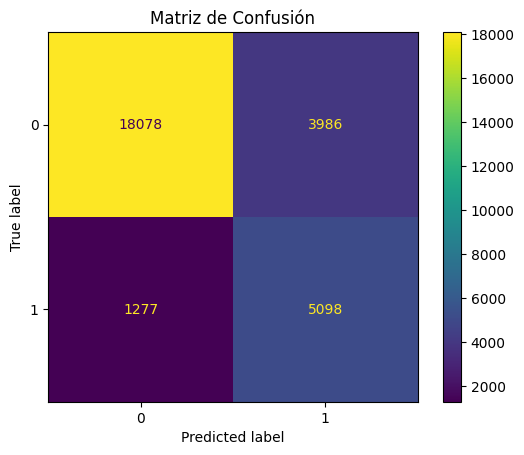

In [ ]:
#Matriz de falsos positivos y falsos negativos (0= No, 1 =Si)
cm = confusion_matrix(y_test_imp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

En la matriz de confusión, vemos que el modelo acierta bastante. Tenemos un total de aproximadamente 23000 aciertos contra 5300 errores, de los cuales nos mojariamos en 1279 veces que es lo que queremos evitar, los falsos negativos.

####Evaluación con curva ROC

AUC: 0.8801


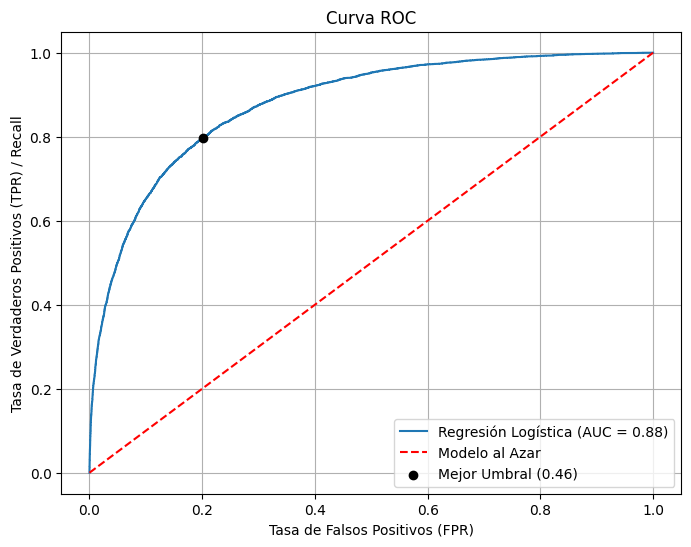

In [ ]:
# Obtenemos las probabilidades de predicción (necesarias para la curva ROC)
y_pred_proba = regresión_logis.predict_proba(x_test_imp)[:, 1]

# Calcular el AUC (Área debajo de la curva)
auc = roc_auc_score(y_test_imp, y_pred_proba)
print(f'AUC: {round(auc, 4)}')

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_imp, y_pred_proba) #False postive rate - True postive rate - Umbral

# Calculamos el G-Mean (Media geométrica) para cada umbral
gmeans = np.sqrt(tpr * (1 - fpr))
# Encontramos el índice (la posición) del G-Mean más grande
ix = np.argmax(gmeans)
# Obtenemos el umbral que corresponde a esa posición
best_threshold = thresholds[ix]


# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Regresión Logística (AUC = {round(auc, 2)})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Modelo al Azar')
# Dibujamos un punto en la coordenada (FPR, TPR) que corresponde al mejor umbral
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label=f'Mejor Umbral ({round(best_threshold, 2)})', zorder=5) # 'zorder=5' hace que el punto se dibuje por encima de la línea, simple estética
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

En la curva ROC, vemos que el modelo supera ampliamente la liea del modelo aleatorio. También vemos que el umbral óptimo es bastante cercano al 0.5

Métricas con el umbral óptimo (0.46):
              precision    recall  f1-score   support

           0      0.932     0.799     0.860     22064
           1      0.534     0.798     0.640      6375

    accuracy                          0.799     28439
   macro avg      0.733     0.798     0.750     28439
weighted avg      0.843     0.799     0.811     28439



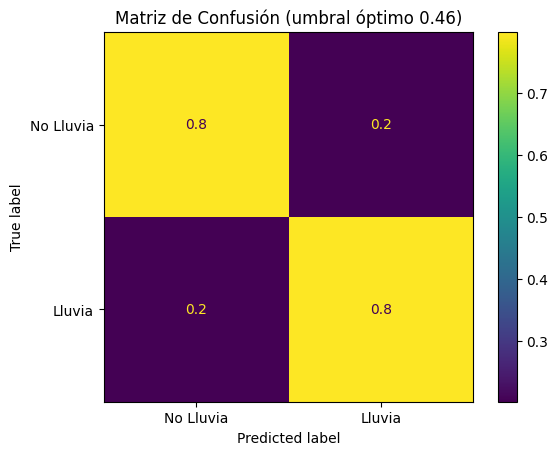

In [ ]:
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Métricas con el umbral óptimo (0.46):")
print(classification_report(y_test_imp, y_pred_opt, digits=3))

ConfusionMatrixDisplay.from_predictions(
    y_test_imp, y_pred_opt, normalize='true',
    display_labels=['No Lluvia', 'Lluvia'], cmap='viridis'
)
plt.title("Matriz de Confusión (umbral óptimo 0.46)")
plt.show()


Conclusión del Modelo con Umbral Óptimo
Tras entrenar un modelo de Regresión Logística y ajustar el umbral de decisión a 0.46 (basado en la maximización de la G-Mean para equilibrar las tasas de acierto de ambas clases), se obtuvieron las siguientes métricas en el conjunto de prueba:

Accuracy: 0.799
Informe de Clasificación (Umbral 0.46):
Clase 'No' (No Lluvia): Precision: 0.932, Recall: 0.799, F1-score: 0.860
Clase 'Yes' (Lluvia): Precision: 0.534, Recall: 0.798, F1-score: 0.640
AUC: 0.8801
El modelo presenta un AUC de 0.8801, lo que indica una buena capacidad para distinguir entre días con y sin lluvia.

Al utilizar el umbral de 0.46, el modelo logra un recall del 79.8% para la clase "Lluvia". Esto significa que identifica correctamente casi el 80% de los días en los que realmente lloverá, lo cual es crucial para minimizar los falsos negativos (días de lluvia no predicha). La precisión para la clase "Lluvia" es del 53.4%, indicando que aproximadamente la mitad de las veces que el modelo predice lluvia, esta efectivamente ocurre.

Comparado con el umbral por defecto (0.5), el ajuste a 0.46 ha mantenido un recall similar para la clase positiva, pero con una ligera disminución en la precisión y el F1-score de esta clase, así como en el accuracy general. Sin embargo, este umbral optimizado por G-Mean proporciona un mejor equilibrio en la capacidad de predicción para ambas clases en el contexto de un dataset desbalanceado.

Los puntajes F1 en los conjuntos de entrenamiento (0.6649) y prueba (0.6463) son cercanos, sugiriendo que el modelo es consistente y no muestra signos evidentes de overfitting o underfitting con este umbral.

En conclusión, el modelo de Regresión Logística con el umbral ajustado a 0.46 ofrece un rendimiento equilibrado y es particularmente efectivo en la detección de días de lluvia, lo cual se alinea con el objetivo del proyecto de predecir si lloverá el día siguiente. Si bien hay un compromiso en la precisión para la clase minoritaria, el alto recall obtenido es un punto fuerte para aplicaciones donde minimizar los falsos negativos es prioritario.

####Análisis de fitting

In [ ]:
#Verificamos el fitting a través del f1-score

# Puntuación con los datos de entrenamiento
score_train = f1_score(y_train_imp, regresión_logis.predict(x_train_imp))

# Puntuación con los datos de testeo (la misma que ya teníamos en la predicción orignal)
score_test = f1_score(y_test_imp, regresión_logis.predict(x_test_imp))


print(f"Puntaje F1 (Train): {round(score_train, 4)}")
print(f"Puntaje F1 (Test):  {round(score_test, 4)}")

Puntaje F1 (Train): 0.6649
Puntaje F1 (Test):  0.6463


Vemos con los puntajes que el modelo es consistente, no ha señales de overfitting o de underfitting.